In [15]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
import tensorflow as tf

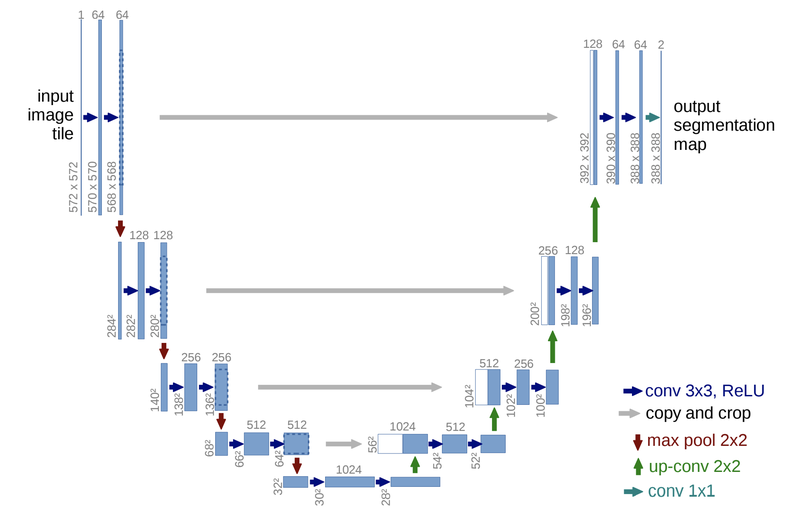

In [53]:
filters = [64, 128, 256, 512, 1024]

def build_model(input_shape=(572, 572, 3), filters= [64, 128, 256, 512, 1024], kernel=3):
    inputs = Input(input_shape)
    x = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b1_conv1')(inputs)
    b1 = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b1_conv2')(x)
    
    x = MaxPooling2D(pool_size=(2,2), name='b2_pool')(b1)
    x = Conv2D(filters[1], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b2_conv1')(x)
    b2 = Conv2D(filters[1], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b2_conv2')(x)
    
    x = MaxPooling2D(pool_size=(2,2), name='b3_pool')(b2)
    x = Conv2D(filters[2], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b3_conv1')(x)
    b3 = Conv2D(filters[2], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b3_conv2')(x)
    
    x = MaxPooling2D(pool_size=(2,2), name='b4_pool')(b3)
    x = Conv2D(filters[3], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b4_conv1')(x)
    b4 = Conv2D(filters[3], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b4_conv2')(x)
    
    x = MaxPooling2D(pool_size=(2,2), name='b5_pool')(b4)
    x = Conv2D(filters[4], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b5_conv1')(x)
    x = Conv2D(filters[4], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b5_conv2')(x)
    
    x = UpSampling2D(size = (2,2), name='u1_up')(x)
    r1 = tf.image.resize(b4, (x.shape[1], x.shape[2]), name='u1_resize')
    x = concatenate([r1,x], axis = 3, name='u1_merge')
    x = Conv2D(filters[3], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='u1_conv1')(x)
    x = Conv2D(filters[3], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='u1_conv2')(x)
    
    x = UpSampling2D(size = (2,2), name='u2_up')(x)
    r2 = tf.image.resize(b3, (x.shape[1], x.shape[2]), name='u2_resize')
    x = concatenate([r2,x], axis = 3, name='u2_merge')
    x = Conv2D(filters[2], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='u2_conv1')(x)
    x = Conv2D(filters[2], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='u2_conv2')(x)
    
    x = UpSampling2D(size = (2,2), name='u3_up')(x)
    r3 = tf.image.resize(b2, (x.shape[1], x.shape[2]), name='u3_resize')
    x = concatenate([r3,x], axis = 3, name='u3_merge')
    x = Conv2D(filters[1], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='u3_conv1')(x)
    x = Conv2D(filters[1], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='u3_conv2')(x)
    
    x = UpSampling2D(size = (2,2), name='u4_up')(x)
    r4 = tf.image.resize(b1, (x.shape[1], x.shape[2]), name='u4_resize')
    x = concatenate([r4,x], axis = 3, name='u4_merge')
    x = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='u4_conv1')(x)
    x = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='u4_conv2')(x)
    x = Conv2D(2, kernel, activation='relu', padding='same',kernel_initializer='he_normal', name='u4_conv3')(x)
    
    model = Model(inputs = inputs, outputs = x)
    return model

In [54]:
model = build_model()

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 572, 572, 3) 0                                            
__________________________________________________________________________________________________
b1_conv1 (Conv2D)               (None, 570, 570, 64) 1792        input_19[0][0]                   
__________________________________________________________________________________________________
b1_conv2 (Conv2D)               (None, 568, 568, 64) 36928       b1_conv1[0][0]                   
__________________________________________________________________________________________________
b2_pool (MaxPooling2D)          (None, 284, 284, 64) 0           b1_conv2[0][0]                   
____________________________________________________________________________________________

In [50]:
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy')

In [51]:
del model

In [68]:
filters = [64, 128, 256, 512, 1024]

def upp_model(input_shape=(572, 572, 3), filters= [0, 64, 128, 256, 512], kernel=3):
    inputs = Input(input_shape)
#     x0_0 = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b1_conv1')(inputs)
#     x0_0 = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b1_conv2')(x0_0)
    
    x1_0 = MaxPooling2D(pool_size=(2,2), name='b2_pool')(inputs)
    x1_0 = Conv2D(filters[1], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b2_conv1')(x1_0)
    x1_0 = Conv2D(filters[1], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b2_conv2')(x1_0)
    
    x2_0 = MaxPooling2D(pool_size=(2,2), name='b3_pool')(x1_0)
    x2_0 = Conv2D(filters[2], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b3_conv1')(x2_0)
    x2_0 = Conv2D(filters[2], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b3_conv2')(x2_0)
    
    x3_0 = MaxPooling2D(pool_size=(2,2), name='b4_pool')(x2_0)
    x3_0 = Conv2D(filters[3], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b4_conv1')(x3_0)
    x3_0 = Conv2D(filters[3], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b4_conv2')(x3_0)
    
    x4_0 = MaxPooling2D(pool_size=(2,2), name='b5_pool')(x3_0)
    x4_0 = Conv2D(filters[4], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b5_conv1')(x4_0)
    x4_0 = Conv2D(filters[4], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='b5_conv2')(x4_0)
    
    u4_0 = UpSampling2D(size = (2,2), name='u4_0_up')(x4_0)
    r3_0 = tf.image.resize(x3_0, (u4_0.shape[1], u4_0.shape[2]), name='x3_0_resize')
    x3_1 = concatenate([r3_0, u4_0], axis = 3, name='x3_1_merge')
    x3_1 = Conv2D(filters[3], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x3_1_conv1')(x3_1)
    x3_1 = Conv2D(filters[3], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x3_1_conv2')(x3_1)
    
    # 2-2로 감
    u3_0 = UpSampling2D(size = (2,2), name='u3_0_up')(x3_0)
    r2_0 = tf.image.resize(x2_0, (u3_0.shape[1], u3_0.shape[2]), name='a_r2_0_resize')
    x2_1 = concatenate([r2_0,u3_0], axis = 3, name='u1_merge')
    x2_1 = Conv2D(filters[2], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x2_1_conv1')(x2_1)
    x2_1 = Conv2D(filters[2], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x2_1_conv2')(x2_1)
    
    # origin
    u3_1 = UpSampling2D(size = (2,2), name='u3_1_up')(x3_1)
    r2_0 = tf.image.resize(x2_0, (u3_1.shape[1], u3_1.shape[2]), name='b_r2_0_resize')
    r2_1 = tf.image.resize(x2_1, (u3_1.shape[1], u3_1.shape[2]), name='b_r2_1_resize')
    x2_2 = concatenate([r2_0,r2_1, u3_1], axis = 3, name='x2_2_merge')
    x2_2 = Conv2D(filters[2], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x2_2_conv1')(x2_2)
    x2_2 = Conv2D(filters[2], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x2_2_conv2')(x2_2)
    
    # 1-3로 감
    u2_0 = UpSampling2D(size = (2,2), name='u2_0_up')(x2_0)
    r1_0 = tf.image.resize(x1_0, (u2_0.shape[1], u2_0.shape[2]), name='a_r1_0_resize')
    x1_1 = concatenate([r1_0,u2_0], axis = 3, name='x1_1_merge')
    x1_1 = Conv2D(filters[1], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x1_1_conv1')(x1_1)
    x1_1 = Conv2D(filters[1], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x1_1_conv2')(x1_1)
    
    # 1-3로 감
    u2_1 = UpSampling2D(size = (2,2), name='u2_1_up')(x2_1)
    r1_0 = tf.image.resize(x1_0, (u2_1.shape[1], u2_1.shape[2]), name='b_r1_0_resize')
    r1_1 = tf.image.resize(x1_1, (u2_1.shape[1], u2_1.shape[2]), name='b_r1_1_resize')
    x1_2 = concatenate([r1_0, r1_1, u2_1], axis = 3, name='x1_2_merge')
    x1_2 = Conv2D(filters[1], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x1_2_conv1')(x1_2)
    x1_2 = Conv2D(filters[1], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x1_2_conv2')(x1_2)
    
    # origin
    u2_2 = UpSampling2D(size = (2,2), name='u2_2_up')(x2_2)
    r1_0 = tf.image.resize(x1_0, (u2_2.shape[1], u2_2.shape[2]), name='c_r1_0_resize')
    r1_1 = tf.image.resize(x1_1, (u2_2.shape[1], u2_2.shape[2]), name='c_r1_1_resize')
    r1_2 = tf.image.resize(x1_2, (u2_2.shape[1], u2_2.shape[2]), name='c_r1_2_resize')
    x1_3 = concatenate([r1_0, r1_1, r1_2, u2_2], axis = 3, name='x1_3_merge')
    x1_3 = Conv2D(filters[1], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x1_3_conv1')(x1_3)
    x1_3 = Conv2D(filters[1], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x1_3_conv2')(x1_3)
    
    # 0-4로 감
    u1_0 = UpSampling2D(size = (2,2), name='u1_0_up')(x1_0)
    r0_0 = tf.image.resize(x0_0, (u1_0.shape[1], u1_0.shape[2]), name='a_r0_0_resize')
    x0_1 = concatenate([r0_0,u1_0], axis = 3, name='x0_1_merge')
    x0_1 = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x0_1_conv1')(x1_1)
    x0_1 = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x0_1_conv2')(x1_1)
    
    # 0-4로 감
    u1_1 = UpSampling2D(size = (2,2), name='u1_1_up')(x1_1)
    r0_0 = tf.image.resize(x0_0, (u1_1.shape[1], u1_1.shape[2]), name='b_r0_0_resize')
    r0_1 = tf.image.resize(x0_1, (u1_1.shape[1], u1_1.shape[2]), name='b_r0_1_resize')
    x0_2 = concatenate([r0_0, r0_1, u1_1], axis = 3, name='x0_2_merge')
    x0_2 = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x0_2_conv1')(x1_2)
    x0_2 = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x0_2_conv2')(x1_2)
    
    # 0-4로 감
    u1_2 = UpSampling2D(size = (2,2), name='u1_2_up')(x1_2)
    r0_0 = tf.image.resize(x0_0, (u1_2.shape[1], u1_2.shape[2]), name='c_r0_0_resize')
    r0_1 = tf.image.resize(x0_1, (u1_2.shape[1], u1_2.shape[2]), name='c_r0_1_resize')
    r0_2 = tf.image.resize(x0_2, (u1_2.shape[1], u1_2.shape[2]), name='c_r0_2_resize')
    x0_3 = concatenate([r0_0, r0_1, r0_2, u1_2], axis = 3, name='x0_3_merge')
    x0_3 = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x0_3_conv1')(x0_3)
    x0_3 = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x0_3_conv2')(x0_3)
    
    # origin
    u1_3 = UpSampling2D(size = (2,2), name='u1_3_up')(x1_3)
    r0_0 = tf.image.resize(x0_0, (u1_3.shape[1], u1_3.shape[2]), name='d_r0_0_resize')
    r0_1 = tf.image.resize(x0_0, (u1_3.shape[1], u1_3.shape[2]), name='d_r0_1_resize')
    r0_2 = tf.image.resize(x0_0, (u1_3.shape[1], u1_3.shape[2]), name='d_r0_2_resize')
    r0_3 = tf.image.resize(x0_0, (u1_3.shape[1], u1_3.shape[2]), name='d_r0_3_resize')
    x0_4 = concatenate([r0_0, r0_1, r0_2, r0_3, u1_3], axis = 3, name='x0_4_merge')
    x0_4 = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x0_4_conv1')(x0_4)
    x0_4 = Conv2D(filters[0], kernel, activation='relu', padding='valid',kernel_initializer='he_normal', name='x0_4_conv2')(x0_4)
    output = Conv2D(2, kernel, activation='relu', padding='same',kernel_initializer='he_normal', name='x0_4_conv3')(x0_4)
    
    model = Model(inputs = inputs, outputs = output)
    return model

In [69]:
model = upp_model()

model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           [(None, 572, 572, 3) 0                                            
__________________________________________________________________________________________________
b1_conv1 (Conv2D)               (None, 570, 570, 64) 1792        input_26[0][0]                   
__________________________________________________________________________________________________
b1_conv2 (Conv2D)               (None, 568, 568, 64) 36928       b1_conv1[0][0]                   
__________________________________________________________________________________________________
b2_pool (MaxPooling2D)          (None, 284, 284, 64) 0           b1_conv2[0][0]                   
___________________________________________________________________________________________